# Traffic & Transport Dataset

**Programming for Data Analysis Project 2020**

*Development & simulation of a dataset that would form part of a larger traffic & transport study for Galway City.*
***

## Introduction

The main objective of this project is to a take real-world phenomenon and rather than collecting real-world data or using existing data available for this phenomenon, the dataset should be fully modelled or synthesised.

For the real-world phenomenon I have decided to look traffic & transport within Galway City. Traffic conjestion is a major issue for Galway, with slow moving traffic & long delays being a regular occurance throughout the city and surrounding areas, particularly at peak times.

There are a number of features & characteristics about Galway City & the surrounding areas that all contribute to the major traffic & transport issues the city faces:

- Ireland has a very car-centric culture and a over dependence on private vehicles. Public transport, walking & cycling are not as popular as means of travel.
- Galway city is constricted between the Galway Bay to the south & Lough Corrib to the north. The city is divided east / west by the River Corrib, with three principal river crossing which experience heavy traffic flows.   
- The suburban nature of much of the residental developments and the wide distribution of jobs in central & non-central locations. e.g large densities of residental developements are located to the west of the city while a lot of the major businesses & employers are located to the east of the city.

Please refer to the Galway Transport Strategy Report [1] for further information on Galway's traffic & transport issues.

![GTS Map](https://github.com/PaulSweeney89/ProgDA-Project2020/blob/main/Images/GTS%20Map.PNG?raw=true)

**Figure 1** - Galway City & Boundary - [Galway Transport Strategy Report](https://www.galwaycity.ie/uploads/downloads/news_items/Traffic-Transport/GTS/GTS%20Executive%20Summary%20Report%20-%20English.pdf)

## Traffic & Transport Data Collection

Traffic & transport surveys involve the collection of data that will accurately reflect the real-world traffic situation & conditions within the study area. 

There are numerous methods for conducting traffic surveys & studies and many areas from which data can be collected and analysed;
- Traffic volume data can be collected manually by counting the number & category of vehicles passing a particular location on a road over a certain period of time. 
- Video analysis & more modern artificial intelligence collection systems can be implemented at junctions or at sections of road, where data on speed, travel time, time-gaps, category of vehicle etc. can be easily recorded and obtained. 
- Surveys & questionnaires can also form part of traffic & transport suveys & studies, identifying travel behaviours, journey times, modes of transport for various demographics, age groups etc. 

Studies such as the National Travel Survey (NTS) or the Census 2016 Place of Work, School or College (POWSCAR), involved conducting interviews and questionnaires regarding the travel behaviour of respondents.
Data collected included answers to common demographic questions such as age, sex, education, etc. along with travel & transport specific questions, journey purpose, modes of travel, distance travelled etc. 

Reports such as the N6 Galway City Ring Road Design Report, used existing traffic volume data to compare traffic volumes to current road capacities, it includes models developed to provide a prediction of future traffic conditions for Galway's existing roads and also a comparison where new & improved road infrastructure works could be introduced.  

## Simulating a Traffic & Transport Dataset

For simulating the dataset and to form the basis of this project, a number of existing travel, traffic and transport surveys for both Galway & Ireland were reviewed to help establish which varaiables to include within the dataset and to determine approximate values & the distribution of values for each of the variables.

This dataset is to be based off the data collected from a hypothetical survey conducted on 200 residents regarding traffic and travel behaviours within Galway City, the data will be loosely based on information & data found from existing traffic & transport surveys.

In [1]:
# Import Python Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# set plot style
plt.style.use("ggplot")

### Resident's Gender & Age

Both the National Travel Survey 2019 (NTS) & the Census 2016 Place of Work, School or College (POWSCAR) included data regarding the demographic of the survey's respondents, i.e gender & age.

The gender of those surveyed was set as 48.0% males to 52.0% females, distributed as per Census 2016 Population Data for Galway City.

Population of males in Galway City 37800 males. 

Population of females in Galway City 40868 females. 

[statbank.cso.ie](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?MainTable=EY004&TabStrip=Select&PLanguage=0&FF=1)

Females Count = 94   Males Count =  106


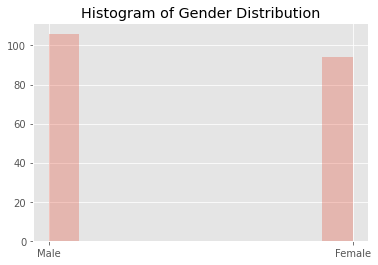

In [2]:
sample_size = 200

g = ['Male', 'Female']
gender = np.random.choice(g, size=sample_size, p=(0.48, 0.52))

males_count = gender.tolist().count('Male')
females_count = gender.tolist().count('Female')
print("Females Count =", females_count, " ",  "Males Count = ", males_count)


# Histogram plot of Galway City gender distribution
plt.title("Histogram of Gender Distribution")
plt.hist(gender, alpha=0.3)
plt.show()

For the purpose of this project the range of ages of those surveyed was selected as a uniform distribution of ages in the range of 18 up to 65.

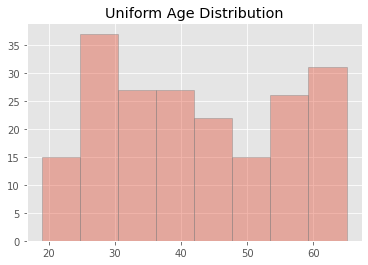

In [3]:
age = np.random.randint(low=18, high=66, size=sample_size)

# Uniform distribution plot of range of ages
plt.title("Uniform Age Distribution")
sns.distplot(age, kde=False, bins=8, hist_kws=dict(edgecolor="grey", linewidth=1))
plt.show()

#### Age Distribution Output

Pandas DataFrame output of the Uniform Distributed Age values generated.

In [4]:
# Age data distribution to dictionary
dict_age = { int(i) :  age.tolist().count(i) for i in age }

# taking dictionary & output key & values as separate lists, age_list  & count_age. 
age_list = list(dict_age.keys())
count_age = list(dict_age.values())

# Create Pandas DataFrame of Private Vehicle Distances for Review.
data_age = {"Age" : age_list, "Count" : count_age}
df_age =pd.DataFrame(data_age)
df_age = df_age.sort_values(by="Age")

# mean age
mean_age = age.mean()
print("Mean Age = ", round(mean_age, 0))

df_age

Mean Age =  42.0


,Age,Count
1,19,4
12,20,1
30,22,4
36,23,3
11,24,3
6,25,9
28,26,7
24,27,6
23,28,3
7,29,4


### Resident's Mode of Travel

From the NTS, the modes of travel listed were categorised as private car - driver, private car - passenger, walk, cycle, public transport & lorry motorcycle other.

For this dataset the categories for mode of travel were simplied to:

- Private vehicle
- Public transport
- Cycle
- Walk

<img src="https://github.com/PaulSweeney89/ProgDA-Project2020/blob/main/Images/modes%20of%20transport.PNG?raw=true" width="500" />

**Figure 2** - Galway Transport Strategy Report [5] - Percentage share of each mode of travel. 

<img src="https://github.com/PaulSweeney89/ProgDA-Project2020/blob/main/Images/NTS%20mode%20of%20Travel.PNG?raw=true" width="1000" />

**Figure 3** - National Travel Survey [6] - Percentage share of each mode of travel. 

From the Galway Transport Strategy Report, it can be seen that the levels of cycling & public transport are very low with a large dependence of private vehicles
The National Travel Survey shows similar figures however with less reliance on private vehicles in the densely populated areas, where there is more of an uptake in the use of cycling & public transport as a means of travel.

For the purpose of this project and to produce a more rounded & interesting dataset from which some observations can be made these percentage share values of mode of transport will be adjusted.

### Mode of Travel - Adjusted for Age Groups

Rather than developing a dataset which divides the modes of travel over the full range of ages (18 - 65 year olds), the below function has been used to proportion the modes of travel differently between each age groups (18-24, 25-45 etc.). This should result in producing a datset from which some clear observations can be made, e.g 18 - 24 year olds tend to travel more by public transport, bicycle or walking compared to other age groups etc. 

In [5]:
def mot(age_list):
    '''Function to determine mode of 
    transport based on age group'''
    
    m = ['private vehicle', 'public transport', 'cycle', 'walk']
    mode = []

# percentage split between modes of travel - 'private vehicle', 'public transport', 'cycle', 'walk'.
# probabilities adjusted per age group.

    for val in age_list:
        
        if val in range(18, 25):
            w = np.random.choice(m, p=[0.1, 0.23, 0.30, 0.37])
            mode.append(w)
            
        elif val in range(25, 45):
            x = np.random.choice(m, p=[0.82, 0.08, 0.05, 0.05])
            mode.append(x)
            
        elif val in range(45, 60):
            y = np.random.choice(m, p=[0.82, 0.09, 0.04, 0.05])
            mode.append(y)

        else:
            z = np.random.choice(m, p=[0.65, 0.12, 0.05, 0.18])
            mode.append(z)
    
    return mode

Mode of Travel Count = 149 Private Vehicles   25 Public Transport   16 Cyclists   10 Walkers


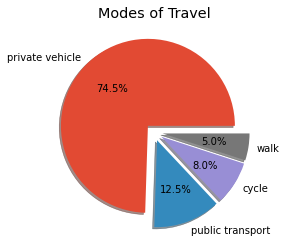

In [6]:
# Modes of transport for range of age groups
mode = mot(age)

# labels for mode of travel
m = ['private vehicle', 'public transport', 'cycle', 'walk']

drivers = mode.count('private vehicle')
passengers = mode.count('public transport')
cyclists = mode.count('cycle')
walkers = mode.count('walk')

print("Mode of Travel Count =", drivers, "Private Vehicles", " ", passengers, "Public Transport", " ", cyclists, "Cyclists", " ", walkers, "Walkers")

# Output count list as 'c'.
c = [drivers] + [passengers] + [cyclists] + [walkers]

# Pie chart of randomly generated split between modes of travel. 
plt.pie(c, labels=m, explode = (0.1, 0.1, 0.1, 0.1), shadow=True, autopct='%1.1f%%')
plt.title("Modes of Travel")
plt.show()

### Generate Journey Distances for Various 'Modes of Travel'

From the National Travel Survey, the average journey distance in 2019 was found to be 13.7 kilometres on average and took 23.3 minutes to complete. 

<img src="https://github.com/PaulSweeney89/ProgDA-Project2020/blob/main/Images/NTS%20Travel%20Distances.PNG?raw=true" width="1000" />

**Figure 4** - National Travel Survey [7] - Percentage distribution of Journey Distances (km).

To develop distance data, different distribution shapes were used to randomly generate values for each of the various modes of travel. 

#### Private Vehicles Journey Distances

Galway city is approx. 10km wide, that is from the outskirts of the west side of the city to the outskirts of the east of the city is approximately 10km as the crow flies. 

The NTS 2019 found the average journey distance to be 13.7km, for the purpose of this project & the development of the dataset it would seem appropriate to use this same value as the mean journey distance for private vehicles in Galway City.

Also due to the relatively narrow width of Galway City, it will be assumed that there will be more shorter journeys made by residents within the city boundaries and less longer journeys made from outside the city boundaries, therefore the distribution shape of the data should reflect this as best as possible.

The Gamma distribution shape was chosen to generate the journey distances as it will provide a good representation of the point mentioned above.

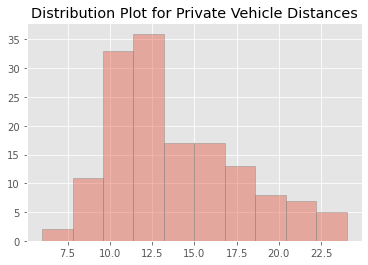

In [7]:
# Journey distances for private vehicles
d_pv = np.random.gamma(shape=13.7, scale=1.0, size=drivers)

# Round distances to nearest km
jd_pv = np.round(d_pv, 0)

# Output distribution plot
sns.distplot(jd_pv, bins=10, kde=False, hist_kws=dict(edgecolor="grey", linewidth=1))

plt.title("Distribution Plot for Private Vehicle Distances")
plt.show()

#### Private Vehicles Journey Distances Distribution Output

Pandas DataFrame output of the Gama Distributed values generated for private vehicle journey distances.

In [8]:
# Distance data distribution to dictionary
dict_dist_pv = { int(i) :  jd_pv.tolist().count(i) for i in jd_pv }

# taking dictionary & output key & values as separate lists, dist_pv  & count_dist. 
dist_pv = list(dict_dist_pv.keys())
count_dist_pv = list(dict_dist_pv.values())

# Create Pandas DataFrame of Private Vehicle Distances for Review.
data_dist_pv = {"Distance Travelled - Private Vehicle (km)" : dist_pv, "Count" : count_dist_pv}
df_dist_pv =pd.DataFrame(data_dist_pv)
df_dist_pv = df_dist_pv.sort_values(by="Distance Travelled - Private Vehicle (km)")

mean_d_pv = d_pv.mean()

print("Mean Distance for Private Vehicles = ", round(mean_d_pv, 1))

df_dist_pv

Mean Distance for Private Vehicles =  13.8


,Distance Travelled - Private Vehicle (km),Count
15,6,2
11,8,6
6,9,5
4,10,11
5,11,22
12,12,17
3,13,19
1,14,17
0,15,11
7,16,6


#### Public Transport Journey Distances

There are currently 12 public bus routes that serve Galway city and the surrounding areas, the routes serve as far as Barna, to the west of the city to Oranmore in the east. 

From reviewing the available bus routes info online, the average route distance for Galway city was calculated to be approximately 7km. 

A normal distribution plot was chosen to generate the public transport journey distances.

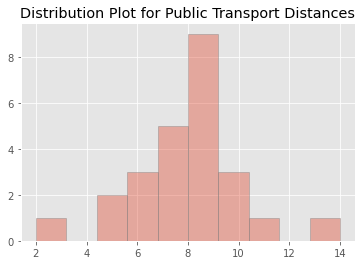

In [9]:
# Journey distances for public transport
d_pt = np.random.normal(loc=7, scale=2, size=passengers)

# Round distances to nearest km
jd_pt = np.round(d_pt, 0)

# Output distribution plot
sns.distplot(jd_pt, bins=10, kde=False, hist_kws=dict(edgecolor="grey", linewidth=1))
plt.title("Distribution Plot for Public Transport Distances")
plt.show()

#### Public Transport Journey Distances Distribution Output

Pandas DataFrame output of the Normal Distributed values generated for public transport journey distances.

In [10]:
# Distance data distribution to dictionary
dict_dist_pt = { int(i) :  jd_pt.tolist().count(i) for i in jd_pt }

# taking dictionary & output key & values as separate lists, dist_pt  & count_dist_pt. 
dist_pt = list(dict_dist_pt.keys())
count_dist_pt = list(dict_dist_pt.values())

mean_d_pt = d_pt.mean()

print("Mean Distance for Public Transport = ", round(mean_d_pt, 1))

# Create Pandas DataFrame of Public Transport Distances for Review.
data_dist_pt = {"Distance Travelled - Public Transport (km)" : dist_pt, "Count" : count_dist_pt}
df_dist_pt =pd.DataFrame(data_dist_pt)
df_dist_pt = df_dist_pt.sort_values(by="Distance Travelled - Public Transport (km)")
df_dist_pt

Mean Distance for Public Transport =  7.8


,Distance Travelled - Public Transport (km),Count
4,2,1
3,5,2
6,6,3
1,7,5
0,8,7
5,9,2
2,10,3
7,11,1
8,14,1


#### Cycling Journey Distances

The NTS 2019 found the average typical journey by bicycle to be 9.5km, this value will be used used to generate the distribution of values for journey distances for cycling.

As it would be expected that more cycling journeys with a distance less than this value would be taken within Galway City, therefore a triangular distribution shape would seem like suitable distriubtion shape to use.

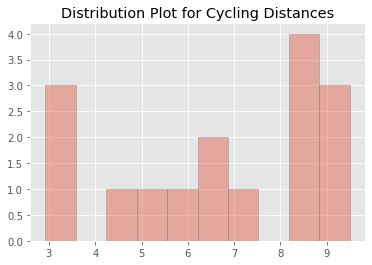

In [11]:
# Journey distances for cyclists
d_cyc = np.random.triangular(left=2, mode=9.5, right=11, size=cyclists)

# Round distances to nearest km
jd_cyc = np.round(d_cyc, 0)

# Output distribution plot
sns.distplot(d_cyc, bins=10, kde=False, hist_kws=dict(edgecolor="grey", linewidth=1))
plt.title("Distribution Plot for Cycling Distances")
plt.show()

#### Cycling Journey Distances Distribution Output

Pandas DataFrame output of the Triangular Distributed values generated for cycling journey distances.

In [12]:
# Distance data distribution to dictionary
dict_dist_cyc = { int(i) :  jd_cyc.tolist().count(i) for i in jd_cyc }

# taking dictionary & output key & values as separate lists, dist_cyc  & count_dist_cyc. 
dist_cyc = list(dict_dist_cyc.keys())
count_dist_cyc = list(dict_dist_cyc.values())

# mean distance
mean_d_cyc = d_cyc.mean()
print("Mean Distance for Cycling = ", round(mean_d_cyc, 1))

# Create Pandas DataFrame of Cycling Distances for Review.
data_dist_cyc = {"Distance Travelled - Cycling (km)" : dist_cyc, "Count" : count_dist_cyc}
df_dist_cyc =pd.DataFrame(data_dist_cyc)
df_dist_cyc = df_dist_cyc.sort_values(by="Distance Travelled - Cycling (km)")
df_dist_cyc

Mean Distance for Cycling =  6.7


,Distance Travelled - Cycling (km),Count
5,3,3
2,4,1
3,6,3
1,7,2
4,8,1
0,9,6


#### Walking Journey Distances

The NTS 2019 found the average typical journey by foot to be 3.3km. As with the triangular distribution used to generate the cycling distances, it would be expected that walking would follow a similar shape, with the more walking journeys with distance less than the mean occurring in Galway City.

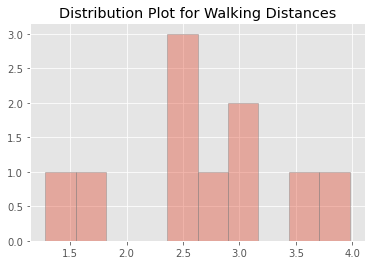

In [13]:
# Journey distances for walking commuters
d_w = np.random.triangular(left=0.5, mode=3.3, right=5.0, size=walkers)

# Round distances to nearest km
jd_w = np.round(d_w, 0)

# Output distribution plot
sns.distplot(d_w, bins=10, kde=False, hist_kws=dict(edgecolor="grey", linewidth=1))
plt.title("Distribution Plot for Walking Distances")
plt.show()

#### Walking Journey Distances Distribution Output

Pandas DataFrame output of the Triangular Distributed values generated for walking journey distances.

In [14]:
# Distance data distribution to dictionary
dict_dist_w = { int(i) :  jd_w.tolist().count(i) for i in jd_w }

# taking dictionary & output key & values as separate lists, dist_w  & count_dist_w. 
dist_w = list(dict_dist_w.keys())
count_dist_w = list(dict_dist_w.values())

# mean distance
mean_d_w = d_w.mean()
print("Mean Distance for Walking = ", round(mean_d_w, 1))

# Create Pandas DataFrame of Walking Distances for Review.
data_dist_w = {"Distance Travelled - Walking (km)" : dist_w, "Count" : count_dist_w}
df_dist_w =pd.DataFrame(data_dist_w)
df_dist_w = df_dist_w.sort_values(by="Distance Travelled - Walking (km)")
df_dist_w

Mean Distance for Walking =  2.7


,Distance Travelled - Walking (km),Count
3,1,1
2,2,1
0,3,7
1,4,1


### Generate Journey Times for Various 'Modes of Travel'

To generate the journey travel times for each mode of travel, the journey distance data generated above were divided by the average speed of the journey for that mode of travel. 

To produce a dataset which doesn't appear too linear or consistent and accounts of some varience in journey times i.e traffic delays etc., the average speed used to calculate the journey times was randomly adjusted by a few +/- km/hour for the different mode of travel.

$$ Time (mins) = \frac{Distance (km)}{Speed (km/hour)} \hspace{1cm} x \hspace{1cm} 60mins $$

**Average travel speeds per mode of travel within Galway City:**

Private vehicle = 30km/hr

Public Transport = 30km/hr

Cycling = 20km/hr

Walking = 5km/hr

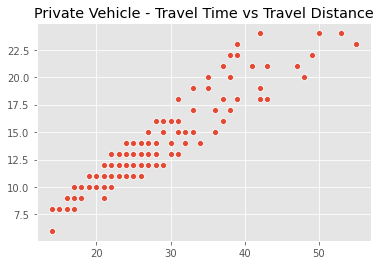

In [15]:
# Journey times for private vehicles

# account for variance in private vehicles speed by randomly adjusting speed by +/- 5km/hr
jt_pv = []
for i, j in enumerate(jd_pv):
    time_calc = round((j / (30 + np.random.randint(-5, 6))) * 60, 0)
    jt_pv.append(time_calc)
    
# Output distance vs time scatter plot
sns.scatterplot(jt_pv, jd_pv)
plt.title("Private Vehicle - Travel Time vs Travel Distance")
plt.show()

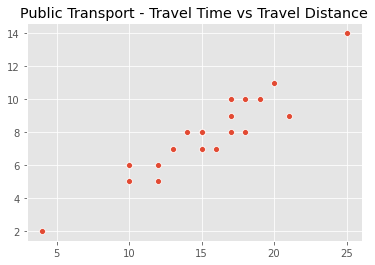

In [16]:
# Journey times for public transport

# account for variance in cycling speed by randomly adjusting speed by +/- 5km/hr
jt_pt = []
for i, j in enumerate(jd_pt):
    time_calc = round((j / (30 + np.random.randint(-5, 6))) * 60, 0)
    jt_pt.append(time_calc)
    
# Output distance vs time scatter plot
sns.scatterplot(jt_pt, jd_pt)
plt.title("Public Transport - Travel Time vs Travel Distance")
plt.show()

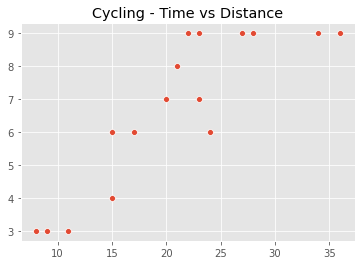

In [17]:
# Journey times for cycling

# account for variance in cycling speed by randomly adjusting speed by +/- 5km/hr
jt_cyc = []
for i, j in enumerate(jd_cyc):
    time_calc = round((j / (20 + np.random.randint(-5, 6))) * 60, 0)
    jt_cyc.append(time_calc)
    
# Output distance vs time scatter plot
sns.scatterplot(jt_cyc, jd_cyc)
plt.title("Cycling - Time vs Distance")
plt.show()

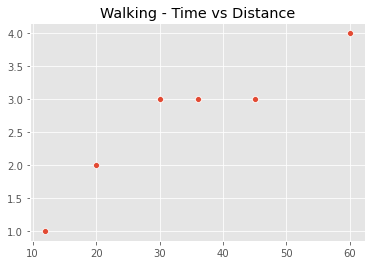

In [18]:
# Journey times for walking

# account for variance in walking speed by randomly adjusting speed by +/- 1km/hr
jt_w = []
for i, j in enumerate(jd_w):
    time_calc = round((j / (5 + np.random.randint(-1, 2))) * 60, 0)
    jt_w.append(time_calc)
    
# Output distance vs time scatter plot
sns.scatterplot(jt_w, jd_w)
plt.title("Walking - Time vs Distance")
plt.show()

### Complie Data into Pandas DataFrame

In [19]:
# Create Pandas Data Frame
data = {'Gender': gender, 'Age': age, 'Mode of Travel': mode, 'Journey Distance (km)': None, 'Journey Time (mins)': None}
df = pd.DataFrame(data)

### Assign Journey Distances & Times to Correct Mode of Transport

In [20]:
# Assigning generated journey times & distances to the different modes of travel

df.loc[df['Mode of Travel'] == 'walk', 'Journey Distance (km)'] = jd_w
df.loc[df['Mode of Travel'] == 'walk', 'Journey Time (mins)'] = jt_w

df.loc[df['Mode of Travel'] == 'cycle', 'Journey Distance (km)'] = jd_cyc
df.loc[df['Mode of Travel'] == 'cycle', 'Journey Time (mins)'] = jt_cyc

df.loc[df['Mode of Travel'] == 'private vehicle', 'Journey Distance (km)'] = jd_pv
df.loc[df['Mode of Travel'] == 'private vehicle', 'Journey Time (mins)'] = jt_pv

df.loc[df['Mode of Travel'] == 'public transport', 'Journey Distance (km)'] = jd_pt
df.loc[df['Mode of Travel'] == 'public transport', 'Journey Time (mins)'] = jt_pt

In [21]:
# Include age groups within the dataset.

df.loc[df['Age'] < 26, 'Age Group'] = "18 to 25"
df.loc[(df['Age'] > 25) & (df['Age'] < 46), 'Age Group'] = "26 to 45"
df.loc[(df['Age'] > 46) & (df['Age'] < 66), 'Age Group'] = "46 to 65"

## Output of Full Traffic & Transport Dataset

In [22]:
# sort dataset by Age
df.sort_values(by='Age', ascending=True)

,Gender,Age,Mode of Travel,Journey Distance (km),Journey Time (mins),Age Group
1,Male,19,walk,3,45,18 to 25
23,Male,19,private vehicle,14,24,18 to 25
3,Male,19,cycle,9,36,18 to 25
100,Male,19,public transport,10,19,18 to 25
18,Male,20,public transport,7,13,18 to 25
...,...,...,...,...,...,...
54,Female,64,private vehicle,13,25,46 to 65
169,Female,64,cycle,6,17,46 to 65
58,Female,64,private vehicle,10,19,46 to 65
67,Male,65,private vehicle,8,16,46 to 65


## Traffic & Transport Dataset Plots

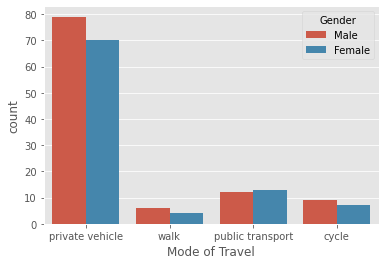

In [27]:
sns.countplot(x="Mode of Travel", data=df, hue='Gender');

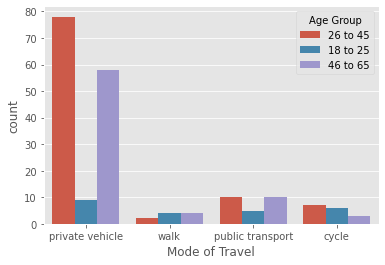

In [28]:
sns.countplot(x="Mode of Travel", data=df, hue='Age Group');

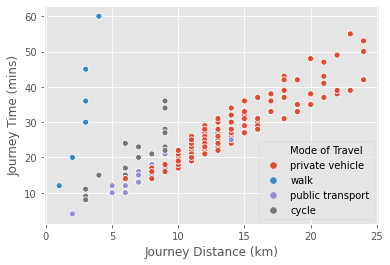

In [33]:
sns.scatterplot(x='Journey Distance (km)', y='Journey Time (mins)', hue='Mode of Travel', data=df);

## Reference:

[1] [Galway Transport Strategy Report](https://www.galwaycity.ie/uploads/downloads/news_items/Traffic-Transport/GTS/GTS%20Executive%20Summary%20Report%20-%20English.pdf)

[2] [National Travel Survey 2019](https://www.cso.ie/en/releasesandpublications/ep/p-nts/nationaltravelsurvey2019/)

[3] [Census 2016 Place of Work, School or College (POWSCAR)](https://www.cso.ie/en/census/census2011placeofworkschoolorcollege-censusofanonymisedrecordspowscar/)

[4] [N6 Galway City Ring Road Design Report](http://www.pleanala.ie/publicaccess/ABP-302848-18%20-%20FI%20Response/ABP-302848-18%20-%20Volume%204%20-%20RFI%20Documentation/Volume%201%20-%20Report/ABP-302848-18%20-%20RFI%20Design%20Report%20-%20Volume%201%20-%20Main%20Report.pdf)

[5] [Galway Transport Strategy Report, Appendix A - Transport Demand](https://www.galwaycity.ie/uploads/downloads/news_items/Traffic-Transport/GTS/GTS%20Appendix%20A%20Transport%20Demand.pdf)

[6] [www.cso.ie, National Travel Survey 2019, How We Travelled](https://www.cso.ie/en/releasesandpublications/ep/p-nts/nationaltravelsurvey2019/howwetravelled/)

[7] [www.cso.ie, National Travel Survey 2019, Distance And Duration](https://www.cso.ie/en/releasesandpublications/ep/p-nts/nationaltravelsurvey2019/distanceandduration/)